<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/DroughtPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/ERA5_COMBINED/201505-202309.csv")
dataset

,Unnamed: 0,Month,Lon,Lat,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
0,0,201505,9.208,37.505,292.818,283.608,305.405,286.220,0.021006,0.000000,...,0.179231,0.164235,NaN,NaN,4797.35,2689.45,295.875,0.000001,-0.833514,-0.913074
1,1,201505,9.657,37.505,292.839,283.988,305.404,286.520,0.020244,0.000000,...,0.178913,0.161112,NaN,NaN,4676.50,2863.50,295.602,0.000002,-0.970380,-0.844767
2,2,201505,3.369,37.056,292.296,284.591,306.343,286.849,0.011030,0.000000,...,0.097784,0.088205,NaN,NaN,4307.48,2740.11,295.231,0.000012,-1.704530,-1.869160
3,3,201505,3.818,37.056,292.105,284.314,306.379,286.606,0.012269,0.000000,...,0.119543,0.105292,NaN,NaN,4247.37,2708.59,295.290,0.000013,-1.726370,-1.874620
4,4,201505,4.267,37.056,291.855,283.943,306.398,286.190,0.018120,0.000000,...,0.153508,0.128331,NaN,NaN,4154.62,2681.86,295.341,0.000012,-1.751720,-1.920560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352991,13391,202309,19.988,-35.259,287.069,279.898,294.821,281.649,0.094790,0.000000,...,0.187951,0.213317,0.024678,0.025565,6111.18,3565.15,289.527,NaN,2.932740,1.531950
1352992,13392,202309,37.505,-46.937,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352993,13393,202309,37.954,-46.937,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352994,13394,202309,37.505,-47.386,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.describe()

,Unnamed: 0,Month,Lon,Lat,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
count,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,...,1.345872e+06,1.346038e+06,1.217163e+06,1.219035e+06,1.349670e+06,1.349670e+06,1.350269e+06,1.348653e+06,1.350177e+06,1.350292e+06
mean,6.697500e+03,2.019105e+05,1.825826e+01,6.108191e+00,2.976904e+02,2.888097e+02,3.073844e+02,2.836715e+02,5.366456e-02,5.600628e-05,...,1.529533e-01,1.460223e-01,-1.352636e-03,-1.248988e-03,3.424513e+03,2.135775e+03,2.985856e+02,2.596017e-05,-6.535210e-01,-7.703915e-01
std,3.867094e+03,2.448672e+02,1.599541e+01,1.774464e+01,5.728601e+00,6.659536e+00,5.735195e+00,8.840898e+00,9.017791e-02,2.439198e-04,...,1.288739e-01,1.168588e-01,2.309979e-02,2.247615e-02,2.354571e+03,1.415600e+03,5.653897e+00,4.225233e-05,1.348428e+00,1.289709e+00
min,0.000000e+00,2.015050e+05,-2.582700e+01,-4.738600e+01,2.707980e+02,2.563230e+02,2.805750e+02,2.565430e+02,1.627390e-05,0.000000e+00,...,2.000000e-02,2.000280e-02,-2.646520e-01,-2.667740e-01,-8.812710e+02,-1.516340e+02,2.777050e+02,0.000000e+00,-5.000000e+00,-5.000000e+00
25%,3.348750e+03,2.017060e+05,6.962000e+00,-7.411000e+00,2.944630e+02,2.846860e+02,3.035020e+02,2.762470e+02,2.276710e-04,0.000000e+00,...,5.053618e-02,5.634820e-02,-8.553455e-03,-7.791780e-03,1.125050e+03,8.495540e+02,2.955910e+02,5.545890e-08,-1.505230e+00,-1.614060e+00
50%,6.697500e+03,2.019070e+05,1.998800e+01,9.208000e+00,2.981460e+02,2.904290e+02,3.070680e+02,2.843580e+02,6.324845e-03,0.000000e+00,...,1.058500e-01,9.840695e-02,-8.995750e-04,-8.256030e-04,2.818600e+03,1.681870e+03,2.990610e+02,3.657270e-06,-6.762560e-01,-8.521145e-01
75%,1.004625e+04,2.021080e+05,3.031800e+01,2.043700e+01,3.012860e+02,2.939900e+02,3.116390e+02,2.918040e+02,7.555740e-02,1.069570e-06,...,2.222810e-01,2.104940e-01,4.872545e-03,4.924605e-03,5.494120e+03,3.268957e+03,3.022190e+02,3.589990e-05,2.429010e-01,6.848940e-02
max,1.339500e+04,2.023090e+05,5.142900e+01,3.750500e+01,3.139530e+02,3.039010e+02,3.231840e+02,3.005000e+02,1.790260e+00,1.399220e-02,...,6.888350e-01,6.773250e-01,2.306410e-01,2.661300e-01,9.259810e+03,6.461520e+03,3.141030e+02,3.989610e-04,5.000000e+00,5.000000e+00


In [5]:
dataset.isna().sum()

Unnamed: 0                              0
Month                                   0
Lon                                     0
Lat                                     0
temperature_2m                          0
temperature_2m_min                      0
temperature_2m_max                      0
dewpoint_temperature_2m                 0
total_precipitation_sum                 0
total_precipitation_min                 0
total_precipitation_max                 0
u_component_of_wind_10m                 0
v_component_of_wind_10m                 0
surface_net_solar_radiation_sum         0
total_evaporation_sum                   0
soil_moisture_am                     7124
soil_moisture_pm                     6958
soil_moisture_am_anomaly           135833
soil_moisture_pm_anomaly           133961
NDVI                                 3326
EVI                                  3326
next_month_tempreature               2727
next_month_precipitation             4343
spei01                            

In [6]:
dataset = dataset.drop(["soil_moisture_am_anomaly", "soil_moisture_pm_anomaly"], axis = 1)

In [7]:
dataset.dropna(subset=['spei01', 'spei03', 'next_month_precipitation', 'next_month_tempreature', 'EVI', 'NDVI', "soil_moisture_am", "soil_moisture_pm"], inplace=True)

In [8]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lon                                0
Lat                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
dtype: int64

In [ ]:
len(dataset)

1343574

<ipython-input-18-d021248850a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


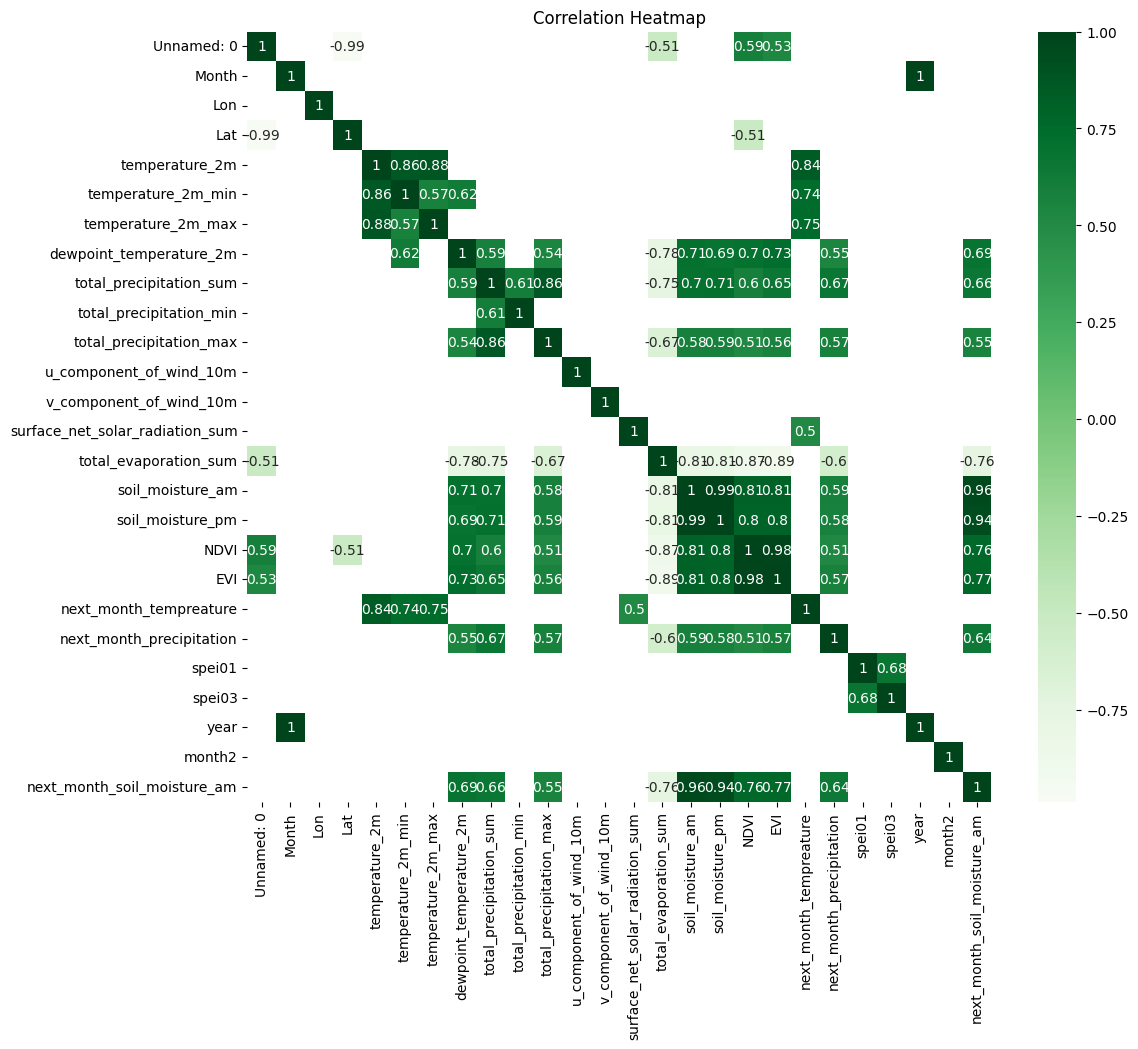

In [18]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()

- Longitude is moderately inversely correlated to NDVI
- Average temperature this month is strongly correlated to average temperature the following month
- Average temperature is strongly correlated to minimum and maximum temperature
- Dewpoint temperature is strongly correlated with NDVI, EVI, and soil moisture. It is moderately correlated with next month precipitation, past month precipitation, and past month temperature
- Total past month precipitation is strongly correlated with soil moisture, maximum precipitation, and dewpoint temperature
- NDVI and EVI are strongly correlated with soil moisture


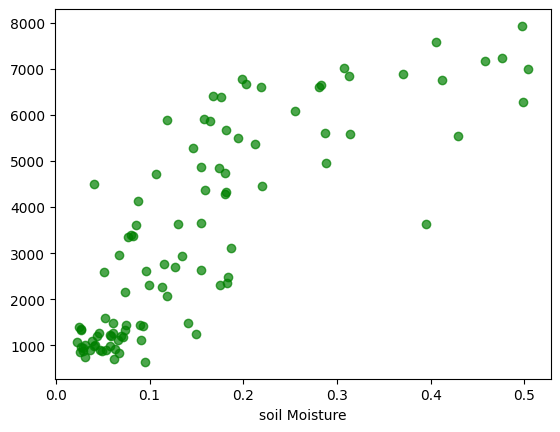

In [ ]:
import random

sample_df = dataset.sample(n=100, axis='rows')

soil_moisture = sample_df["soil_moisture_am"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(soil_moisture, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("soil Moisture")

plt.show()

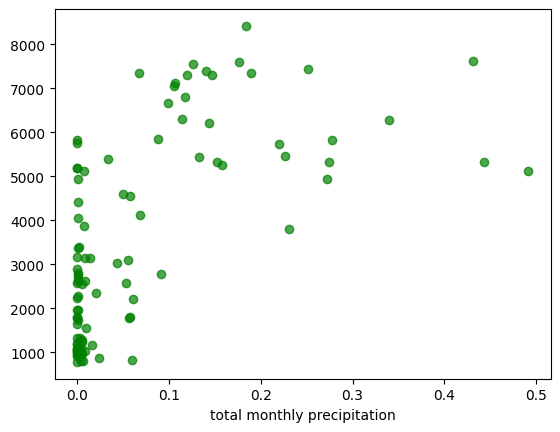

In [ ]:
sample_df = dataset.sample(n=100, axis='rows')

total_precipitation_sample = sample_df["total_precipitation_sum"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(total_precipitation_sample, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("total monthly precipitation")

plt.show()

<ipython-input-17-d8f96d5f0668>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


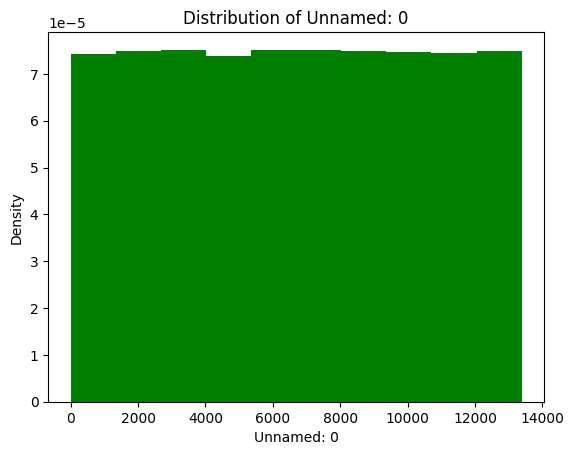

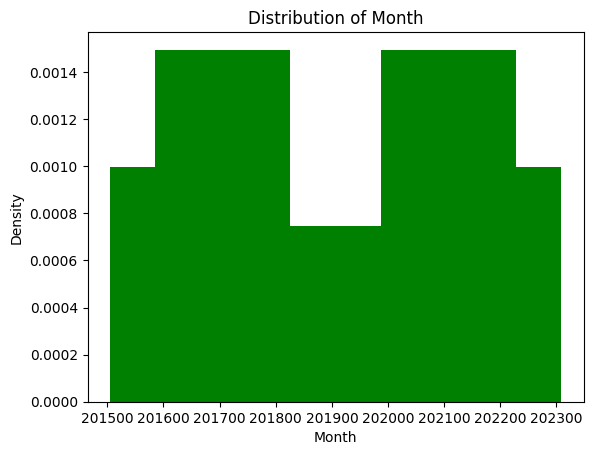

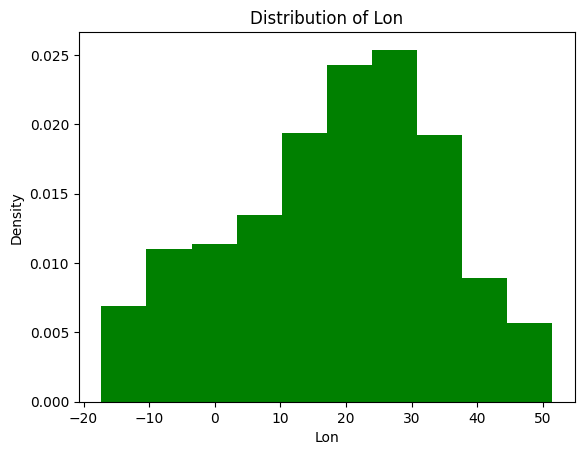

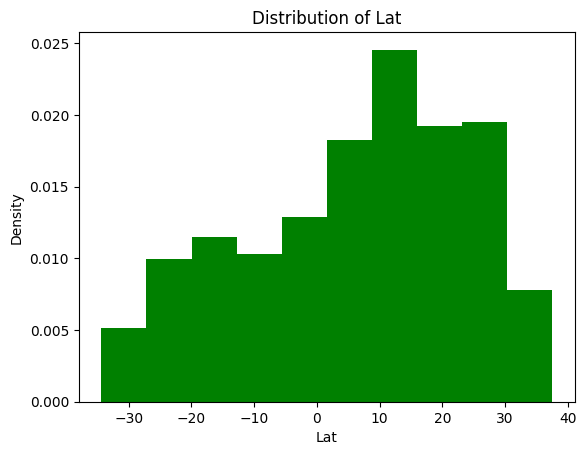

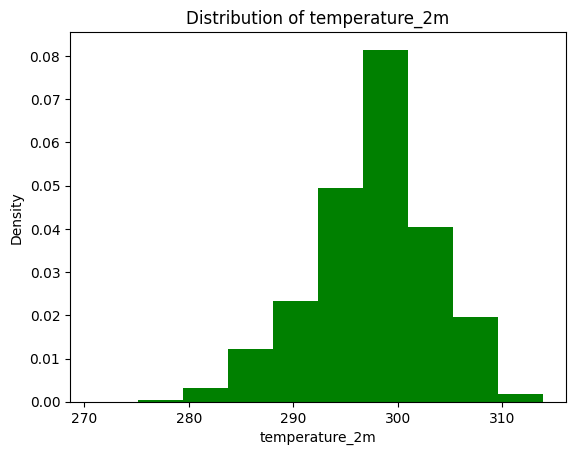

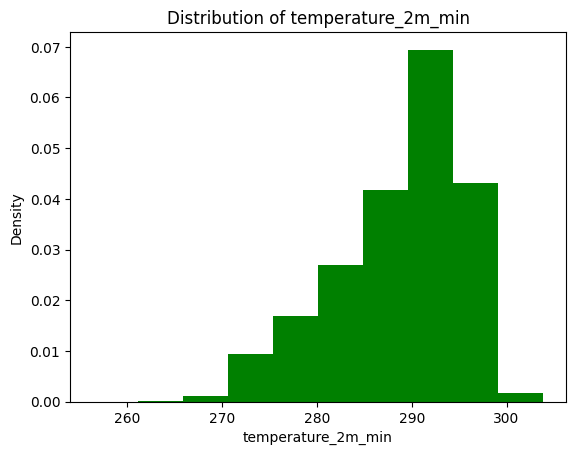

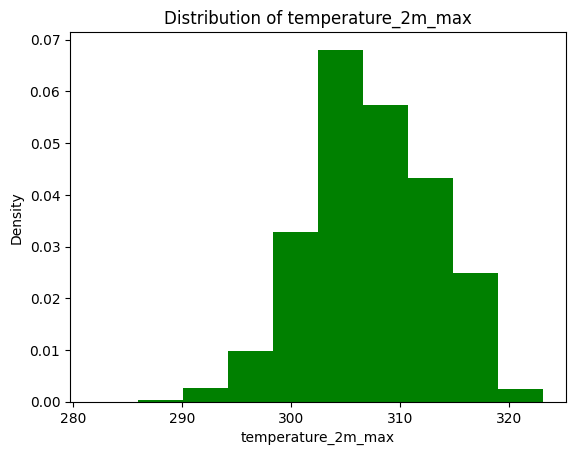

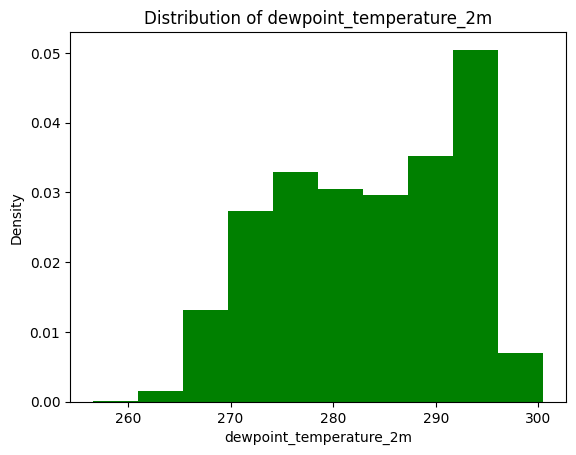

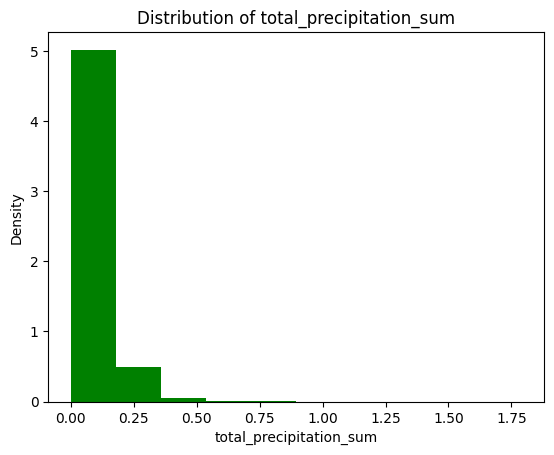

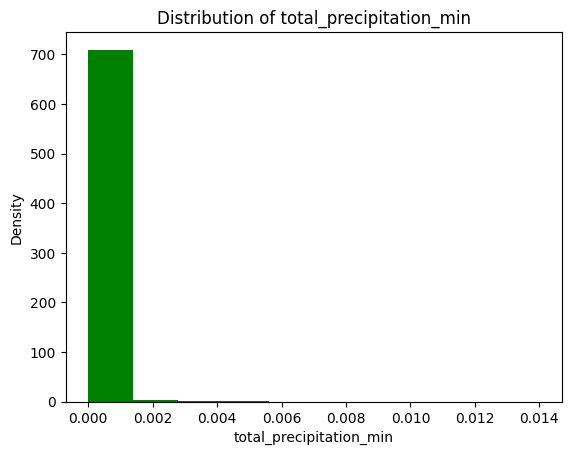

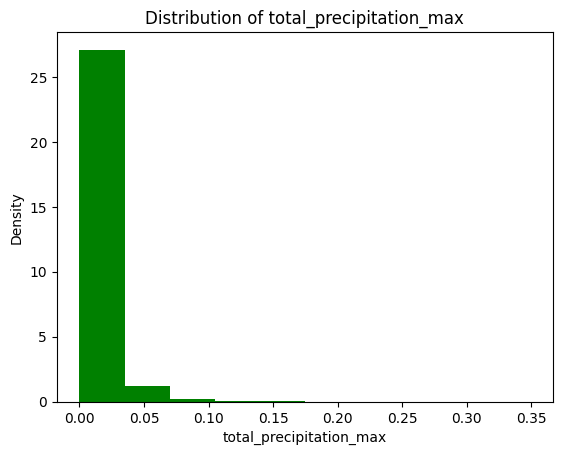

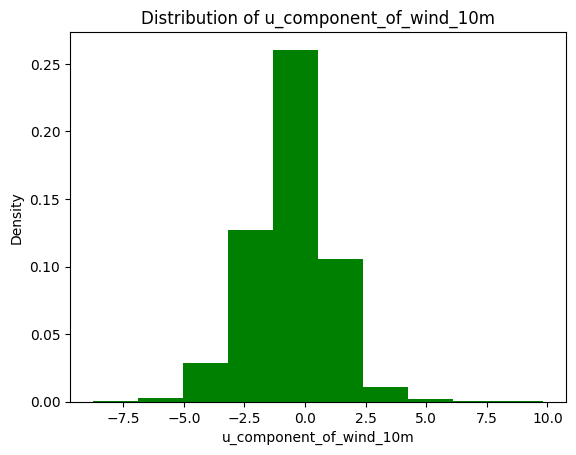

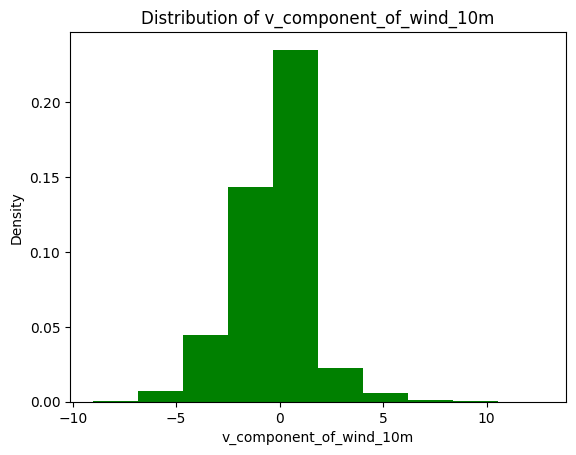

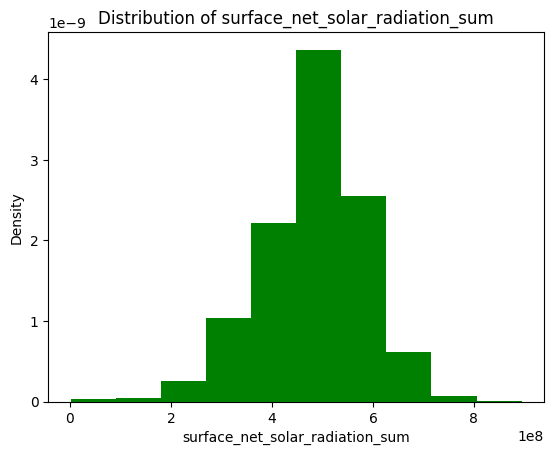

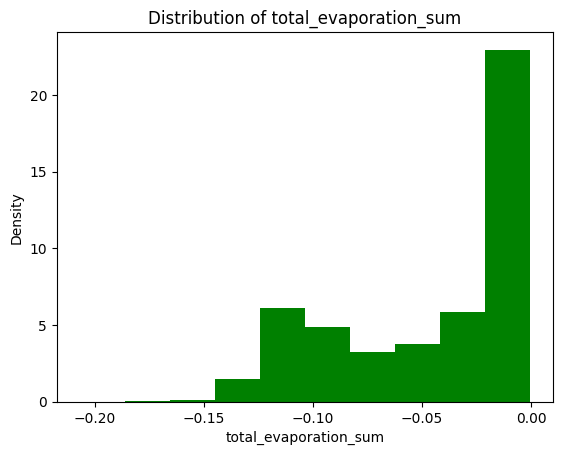

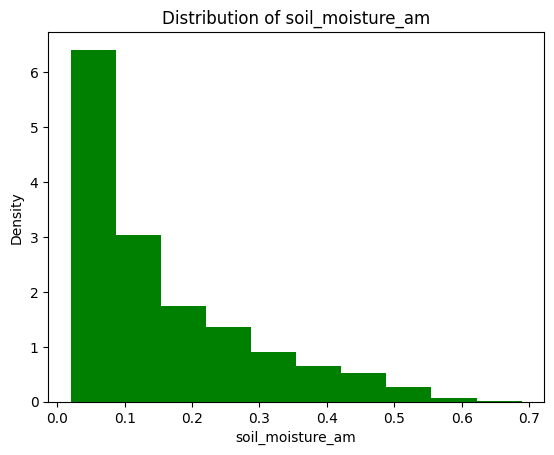

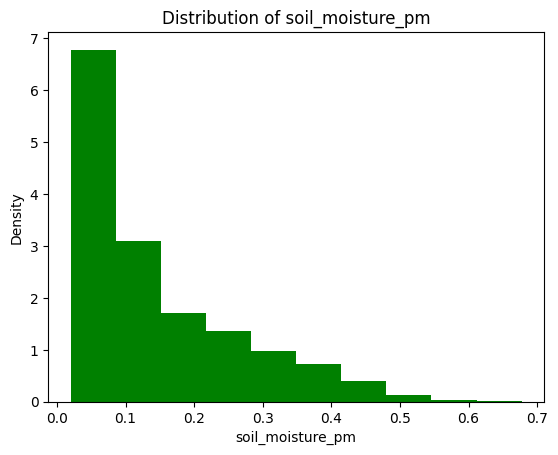

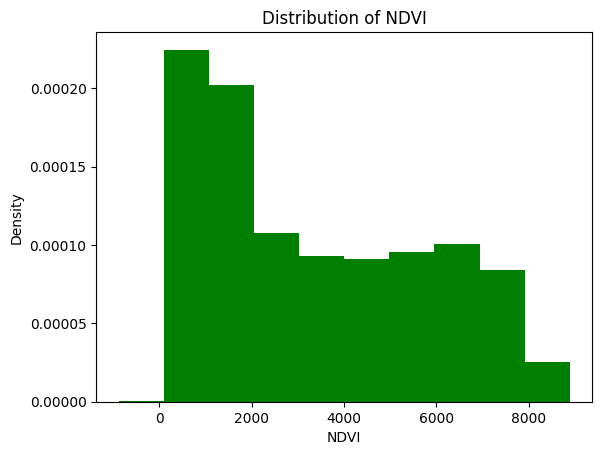

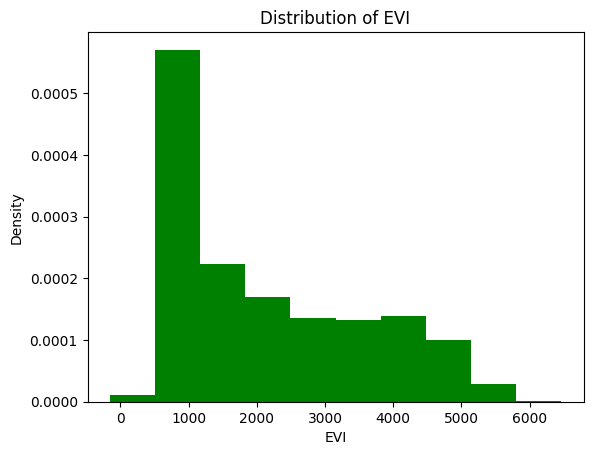

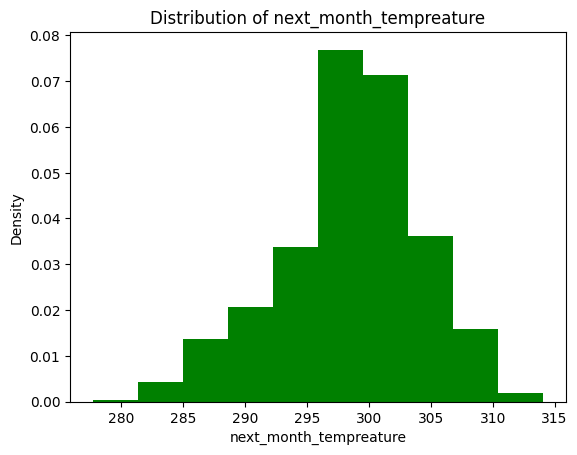

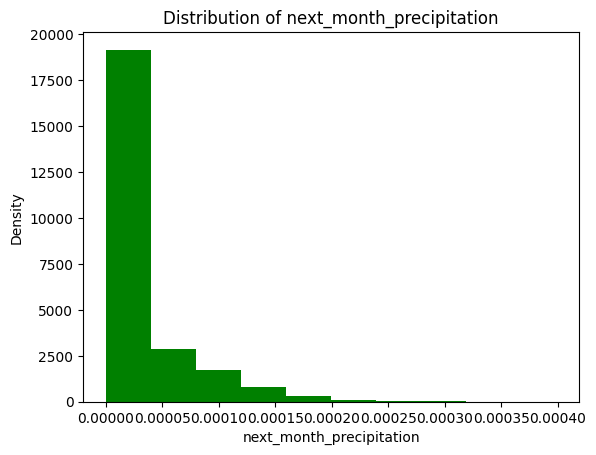

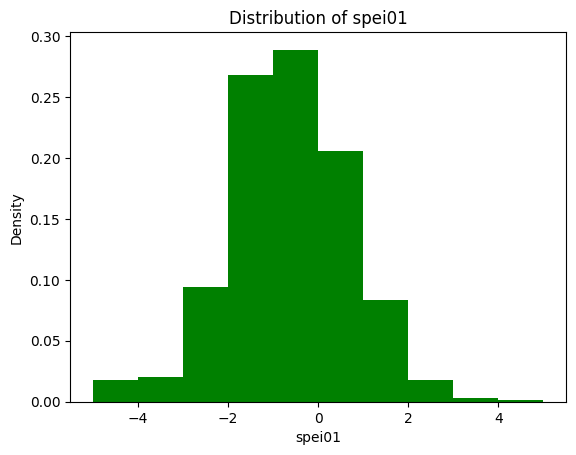

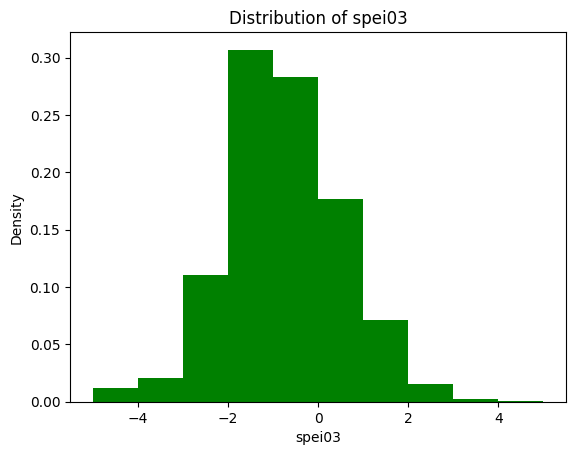

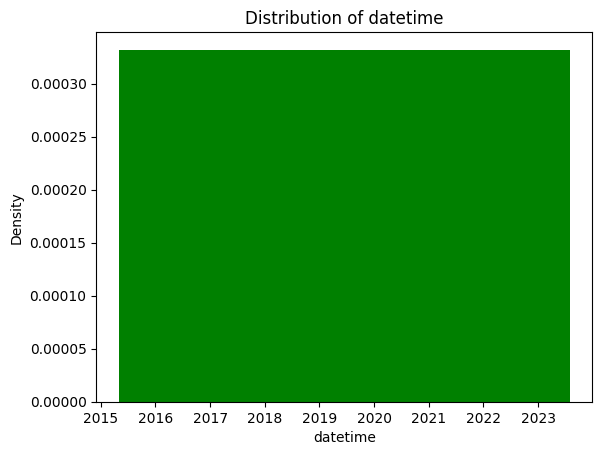

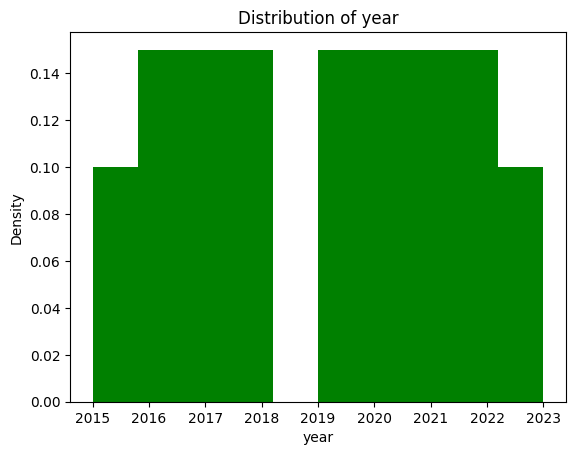

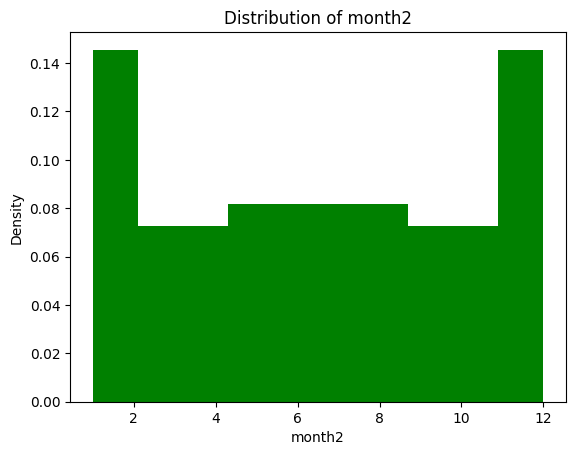

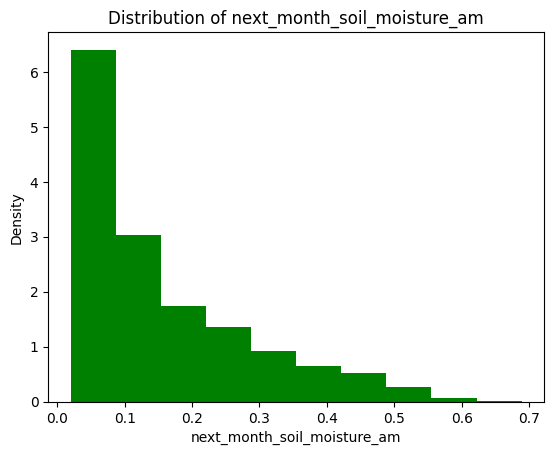

In [17]:
column_list = dataset.columns.values.tolist()

for col_name in column_list:
    plt.figure()
    plt.hist(dataset[col_name], density = True, color = 'green')
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

In [9]:
dataset['datetime'] = pd.to_datetime(dataset['Month'], format='%Y%m')

In [10]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month2'] = dataset['datetime'].dt.month

In [11]:
dataset

,Unnamed: 0,Month,Lon,Lat,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_pm,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2
0,0,201505,9.208,37.505,292.818,283.608,305.405,286.220,0.021006,0.0,...,0.164235,4797.35,2689.45,295.875,0.000001,-0.833514,-0.913074,2015-05-01,2015,5
1,1,201505,9.657,37.505,292.839,283.988,305.404,286.520,0.020244,0.0,...,0.161112,4676.50,2863.50,295.602,0.000002,-0.970380,-0.844767,2015-05-01,2015,5
2,2,201505,3.369,37.056,292.296,284.591,306.343,286.849,0.011030,0.0,...,0.088205,4307.48,2740.11,295.231,0.000012,-1.704530,-1.869160,2015-05-01,2015,5
3,3,201505,3.818,37.056,292.105,284.314,306.379,286.606,0.012269,0.0,...,0.105292,4247.37,2708.59,295.290,0.000013,-1.726370,-1.874620,2015-05-01,2015,5
4,4,201505,4.267,37.056,291.855,283.943,306.398,286.190,0.018120,0.0,...,0.128331,4154.62,2681.86,295.341,0.000012,-1.751720,-1.920560,2015-05-01,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352979,13379,202309,24.928,-34.361,287.841,281.930,301.169,282.571,0.095630,0.0,...,0.208410,4473.81,2216.74,291.103,0.000010,1.435310,1.129540,2023-09-01,2023,9
1352980,13380,202309,25.377,-34.361,288.416,282.802,300.051,282.891,0.088558,0.0,...,0.180785,5536.07,2784.92,291.476,0.000009,1.469330,1.069890,2023-09-01,2023,9
1352981,13381,202309,25.827,-34.361,288.917,283.455,299.488,283.416,0.086572,0.0,...,0.146333,5793.02,2932.49,291.849,0.000008,1.459270,0.901725,2023-09-01,2023,9
1352982,13382,202309,26.276,-34.361,288.627,281.224,302.752,282.159,0.082663,0.0,...,0.145911,5747.65,2922.16,292.203,0.000008,1.387600,0.771825,2023-09-01,2023,9


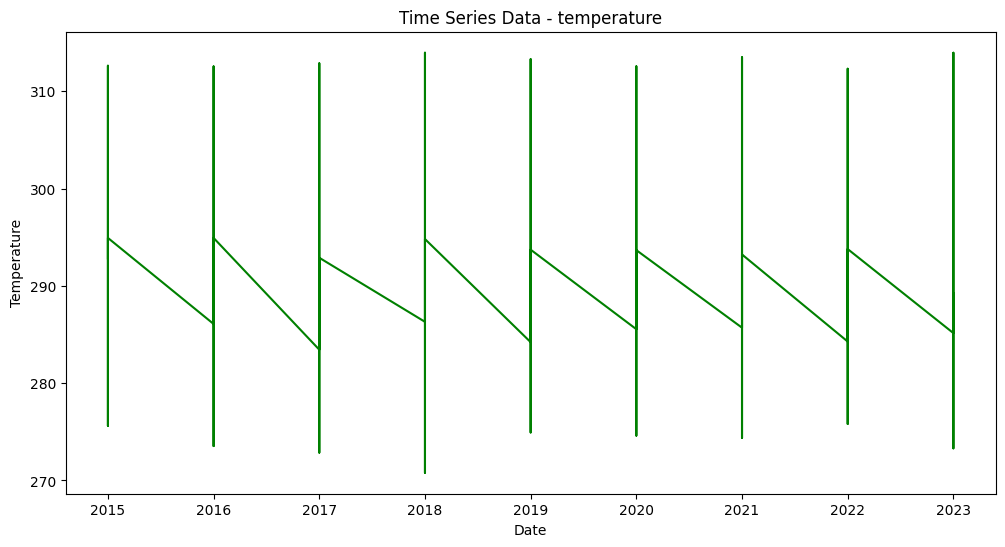

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['year'], dataset['temperature_2m'], color = 'green')
plt.title('Time Series Data - temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
# how to agregate this for yearly sums?

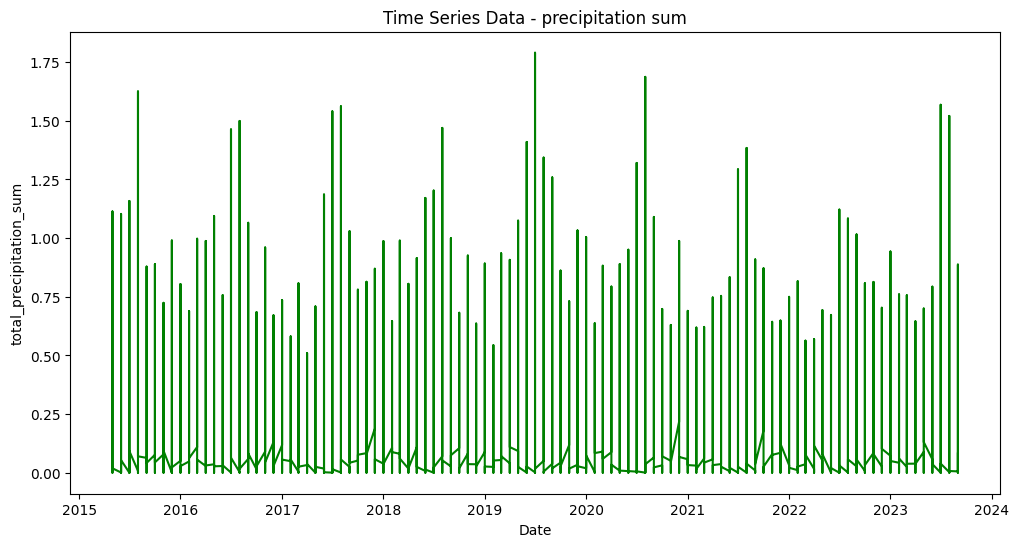

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation sum')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
# make a map graph of average SPEI in Africa, Max SPEI, min SPEI, or SPEI variability

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Month', 'Lon', 'Lat', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2'],
      dtype='object')

In [12]:
dataset.sort_values(by=['Lat', 'Lon', 'Month'], inplace=True)

In [13]:
dataset['next_month_soil_moisture_am'] = dataset.groupby(['Lat', 'Lon'])['soil_moisture_am'].shift(-1)

In [14]:
dataset

,Unnamed: 0,Month,Lon,Lat,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
13364,13364,201505,18.191,-34.361,288.773,282.525,294.960,285.571,0.046455,0.000000e+00,...,4844.43,2107.76,286.640,0.000029,-0.718496,-1.175710,2015-05-01,2015,5,0.285645
26760,13364,201506,18.191,-34.361,286.225,281.939,292.722,283.269,0.098863,3.555210e-08,...,5288.64,2253.58,287.052,0.000044,0.374049,-0.571277,2015-06-01,2015,6,0.309184
40156,13364,201507,18.191,-34.361,285.454,279.618,294.975,281.569,0.131433,0.000000e+00,...,5324.45,2443.61,287.182,0.000060,0.464176,-0.011315,2015-07-01,2015,7,0.269735
53552,13364,201508,18.191,-34.361,286.573,281.093,292.649,283.534,0.053647,0.000000e+00,...,5182.45,2388.77,288.475,0.000012,-1.149490,-0.142480,2015-08-01,2015,8,0.224512
66948,13364,201509,18.191,-34.361,287.536,282.000,296.194,283.477,0.045606,0.000000e+00,...,5094.24,2362.84,290.093,0.000022,-0.562886,-0.532203,2015-09-01,2015,9,0.138358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272621,1,202304,9.657,37.505,289.126,280.781,302.146,283.816,0.039927,0.000000e+00,...,5920.00,4016.50,294.609,0.000033,-0.545337,-1.201260,2023-04-01,2023,4,0.192308
1286017,1,202305,9.657,37.505,291.440,286.791,298.539,287.588,0.082488,4.351140e-07,...,4975.00,3058.00,298.405,0.000022,2.000030,0.253386,2023-05-01,2023,5,0.213079
1299413,1,202306,9.657,37.505,296.389,289.502,307.085,291.351,0.052554,0.000000e+00,...,4600.50,2806.00,299.513,0.000014,0.813970,1.095220,2023-06-01,2023,6,0.134497
1312809,1,202307,9.657,37.505,302.397,293.870,317.186,293.900,0.000069,0.000000e+00,...,3921.00,2367.50,300.146,0.000005,-4.107740,0.417236,2023-07-01,2023,7,0.130088


In [15]:
dataset["soil_moisture_am"]

13364      0.189997
26760      0.285645
40156      0.309184
53552      0.269735
66948      0.224512
             ...   
1272621    0.189832
1286017    0.192308
1299413    0.213079
1312809    0.134497
1326205    0.130088
Name: soil_moisture_am, Length: 1330261, dtype: float64

In [16]:
dataset["next_month_soil_moisture_am"]

13364      0.285645
26760      0.309184
40156      0.269735
53552      0.224512
66948      0.138358
             ...   
1272621    0.192308
1286017    0.213079
1299413    0.134497
1312809    0.130088
1326205    0.128346
Name: next_month_soil_moisture_am, Length: 1330261, dtype: float64

In [15]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lon                                0
Lat                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
next_month_soil_moisture_am        0
d

In [14]:
dataset.dropna(subset=["next_month_soil_moisture_am"], inplace=True)

In [16]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lon                                0
Lat                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
next_month_soil_moisture_am        0
d

In [19]:
#save processed dataframe to csv
dataset.to_csv('/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_50km.csv')

In [21]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_50km.csv")

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_sm = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
y_sm = processed_dataset['next_month_soil_moisture_am']

In [ ]:
# 5. Split data into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# 6. Initialize and train the Random Forest regressor
rf_regressor_sm = RandomForestRegressor(n_estimators=100, random_state=42, verbose = 2)
rf_regressor_sm.fit(X_train_sm, y_train_sm)

# 7. Predict on the test set
y_pred_sm = rf_regressor_sm.predict(X_test_sm)

# 8. Evaluate the model
mse = mean_squared_error(y_test_sm, y_pred_sm)
print(f"Soil Moisture Prediction Mean Squared Error: {mse}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 21.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.5s


Mean Squared Error: 0.0003010407172210646


In [22]:
# 4. Split data into features (X) and target (y)
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
y = processed_dataset['spei01']

In [ ]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose = 2)
rf_regressor.fit(X_train, y_train)

# 7. Predict on the test set
y_pred = rf_regressor.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 9. Use the model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = rf_regressor.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 22.1min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.6s


Mean Squared Error: 0.1450289768172908


In [25]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
    # ... add other hyperparameters as needed
}

less_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30]
    # ... add other hyperparameters as needed
}

# 6. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=less_parameters,
                           cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

# 7. Perform grid search
grid_search.fit(X_train, y_train)

#save results into a dataframe to be graphed later
training_results_df = pd.DataFrame(grid_search.cv_results_)

# 8. Get best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_parameters}")
# 9. Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# 10. Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model for SPEI: {mse}")

# 11. Use the best model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = best_model.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

NameError: ignored

In [ ]:
#Saving the model with joblib
import joblib

filename = '/content/drive/MyDrive/DroughtCastAI/Models/Random Forest/SPEI_11/8.sav'
joblib.dump(best_model, filename)

In [ ]:
#retrieving the model from file
loaded_model = joblib.load(filename)

# evaluate model
y_predict = loaded_model.predict(X_test)

mse_loaded = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

In [27]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Feature scaling (important for SVR)
scaler = StandardScaler()
# TODO: Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create the SVR model
# TODO: Choose and set the kernel type (e.g., 'linear', 'poly', 'rbf', 'sigmoid')
svr_model = SVR(kernel='rbf', verbose=True)

# Train the model using the training sets
svr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
# TODO: Print out the mean squared error and the R-squared value to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: ', mse)
print('R-squared value: ', r2)

[LibSVM]

In [19]:
from sklearn import svm
#X_train, X_test, y_train, y_test

